In [1]:
import pandas as pd
import xarray as xr
import xroms
import matplotlib.pyplot as plt

### Water-level data from Florida panhandle during Michael from USGS  

This notebook demos reading in the tab-delimited water-level data from four files using Pandas.  

All data were downloaded using the Flood Event Viewr to open the legacy web page on 1/20/2023.  

Water level data  
USGS 301116085443000 ST ANDREWS BAY NEAR PANAMA CITY, FL  
USGS 302341086305600 EAST PASS TO CHOCTAWHATCHEE BAY AT DESTIN FL  

In [2]:
data_dir = r'/vortexfs1/home/csherwood/proj/NOPP_Michael/data/'
sa = 'USGS_301116085443000_ST_ANDREWS_BAY_NEAR_PANAMA_CITY_FL'
sa_lat, sa_lon = 30.18783333, -85.7416667
ep = 'USGS_302341086305600_EAST_PASS_TO_CHOCTAWHATCHEE_BAY_AT_DESTIN_FL'
ep_lat, ep_lon = 30.3948472, -86.5155722
url='http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/Michael2018/michael20/michael20.ncml'

In [3]:
col_names = ['Agency','Site','Date','Time','TZ','Elev ft','Approved'] 
df_sa = pd.read_csv( data_dir + sa + '.txt', skiprows = 28, header=None, names = col_names, delim_whitespace=True )
df_sa['dt'] = pd.to_datetime( df_sa['Date'].astype(str) + ' ' + df_sa['Time'].astype(str) + ' +0500' )
df_sa['Elev (m)'] = df_sa['Elev ft'].values*.3048
df_sa

,Agency,Site,Date,Time,TZ,Elev ft,Approved,dt,Elev (m)
0,USGS,301116085443000,2018-10-08,09:10,CDT,1.87,A,2018-10-08 09:10:00+05:00,0.569976
1,USGS,301116085443000,2018-10-08,09:15,CDT,1.88,A,2018-10-08 09:15:00+05:00,0.573024
2,USGS,301116085443000,2018-10-08,09:20,CDT,1.88,A,2018-10-08 09:20:00+05:00,0.573024
3,USGS,301116085443000,2018-10-08,09:25,CDT,1.89,A,2018-10-08 09:25:00+05:00,0.576072
4,USGS,301116085443000,2018-10-08,09:30,CDT,1.89,A,2018-10-08 09:30:00+05:00,0.576072
...,...,...,...,...,...,...,...,...,...
1900,USGS,301116085443000,2018-10-14,23:35,CDT,1.70,A,2018-10-14 23:35:00+05:00,0.518160
1901,USGS,301116085443000,2018-10-14,23:40,CDT,1.70,A,2018-10-14 23:40:00+05:00,0.518160
1902,USGS,301116085443000,2018-10-14,23:45,CDT,1.71,A,2018-10-14 23:45:00+05:00,0.521208
1903,USGS,301116085443000,2018-10-14,23:50,CDT,1.72,A,2018-10-14 23:50:00+05:00,0.524256


In [4]:
col_names = ['Agency','Site No','Date','Time','TZ','Elev ft','Approved'] 
df_ep = pd.read_csv( data_dir + ep + '.txt', skiprows = 29, header=None, names = col_names, delim_whitespace=True )
df_ep['dt'] = pd.to_datetime( df_ep['Date'].astype(str) + ' ' + df_ep['Time'].astype(str) + ' +0500' )
df_ep['Elev (m)'] = df_ep['Elev ft'].values*.3048
df_ep

,Agency,Site No,Date,Time,TZ,Elev ft,Approved,dt,Elev (m)
0,USGS,302341086305600,2018-10-08,13:35,CDT,2.32,A,2018-10-08 13:35:00+05:00,0.707136
1,USGS,302341086305600,2018-10-08,13:40,CDT,2.30,A,2018-10-08 13:40:00+05:00,0.701040
2,USGS,302341086305600,2018-10-08,13:45,CDT,2.31,A,2018-10-08 13:45:00+05:00,0.704088
3,USGS,302341086305600,2018-10-08,13:50,CDT,2.32,A,2018-10-08 13:50:00+05:00,0.707136
4,USGS,302341086305600,2018-10-08,13:55,CDT,2.30,A,2018-10-08 13:55:00+05:00,0.701040
...,...,...,...,...,...,...,...,...,...
1739,USGS,302341086305600,2018-10-14,14:30,CDT,1.33,A,2018-10-14 14:30:00+05:00,0.405384
1740,USGS,302341086305600,2018-10-14,14:35,CDT,1.35,A,2018-10-14 14:35:00+05:00,0.411480
1741,USGS,302341086305600,2018-10-14,14:40,CDT,1.35,A,2018-10-14 14:40:00+05:00,0.411480
1742,USGS,302341086305600,2018-10-14,14:45,CDT,1.34,A,2018-10-14 14:45:00+05:00,0.408432


In [5]:
#### Plot all of the water-level data

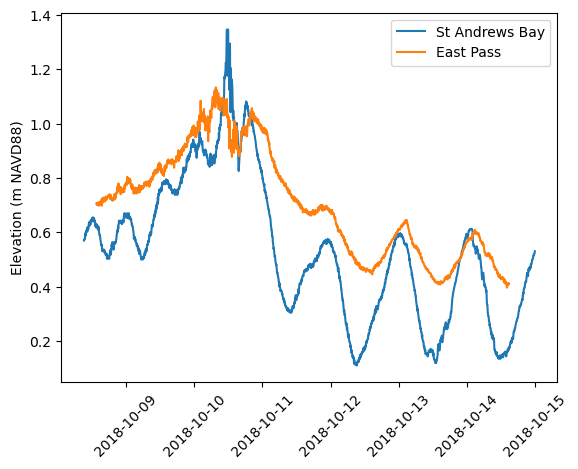

In [6]:
plt.plot(df_sa['dt'],df_sa['Elev (m)'], label='St Andrews Bay')
plt.plot(df_ep['dt'],df_ep['Elev (m)'], label='East Pass')

plt.legend()
plt.ylabel('Elevation (m NAVD88)')
_ = plt.xticks(rotation=45)

In [7]:
# grab modeled zeta at closest lat/lon for East Pass
ds=xroms.open_netcdf(url)
zeta_ep = ds.zeta.xroms.sel2d(ep_lon, ep_lat).compute()

Text(0.5, 1.0, 'East Pass')

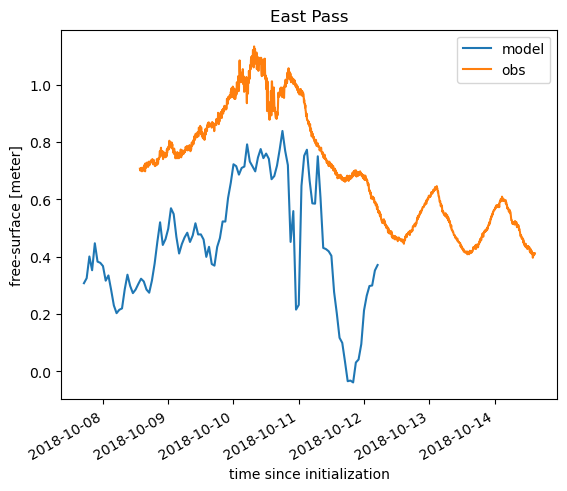

In [8]:
zeta_ep.plot(x='ocean_time', label='model')
plt.plot(df_ep['dt'],df_ep['Elev (m)'], label='obs')
plt.legend()
plt.title('East Pass')

In [9]:
# Grab model output for St Andrews Bay
zeta_sa = ds.zeta.xroms.sel2d(sa_lon, sa_lat).compute()

Text(0.5, 1.0, 'St. Andrews')

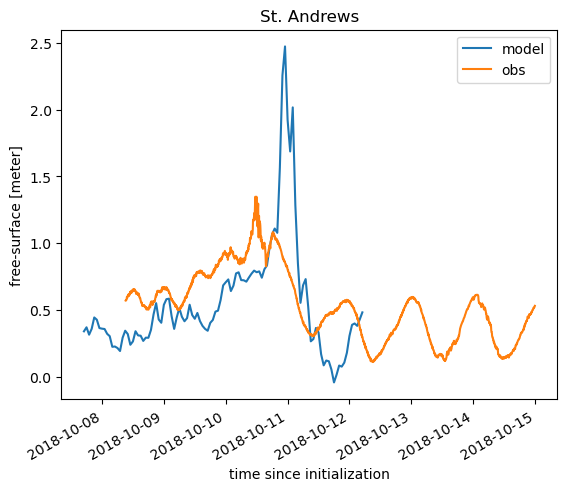

In [10]:
zeta_sa.plot(x='ocean_time',label='model')
plt.plot(df_sa['dt'],df_sa['Elev (m)'], label='obs')
plt.legend()
plt.title('St. Andrews')